# Cafe Sale analysis 
## Nathan Chau-Nguyen
### Goals
### - Practice using Pandas 
### - Practice using matplotlib
### - Using insights to create a PowerBI Dashboard


# Importing libarires needed for analysis

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [119]:
df = pd.read_csv("dirty_cafe_sales.csv", na_values = ["ERROR", "UNKNOWN"])
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


# Prep and clean Quanity, Price Per Unit, Total Spent and remove non useful columns 

In [120]:
def correctVal(row):
    quantity = row["Quantity"]
    pricePer = row["Price Per Unit"]
    total = row["Total Spent"]

    if not pd.isna(quantity) and not pd.isna(pricePer) and pd.isna(total):
        row["Total Spent"] = quantity * pricePer
    elif pd.isna(quantity) and not pd.isna(pricePer) and not pd.isna(total):
        row["Quantity"] = total / pricePer
    elif not pd.isna(quantity) and  pd.isna(pricePer) and not pd.isna(total):
        row["Price Per Unit"] = total / quantity
    return row

df = df.apply(correctVal, axis=1)
df = df.drop("Transaction ID", axis=1)
df["Month"] = pd.to_datetime(df["Transaction Date"]).dt.to_period("M")
df = df.drop("Transaction Date", axis=1)
df.head()

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Month
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07
3,Salad,2.0,5.0,10.0,NaN,NaN,2023-04
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06


# Find number of product sold

In [121]:
sold = df.groupby("Item")[["Quantity"]].sum().sort_values("Quantity", ascending=False).reset_index()
sold.head()



,Item,Quantity
0,Coffee,3534.0
1,Juice,3505.0
2,Salad,3468.0
3,Cake,3462.0
4,Sandwich,3424.0


<function matplotlib.pyplot.show(close=None, block=None)>

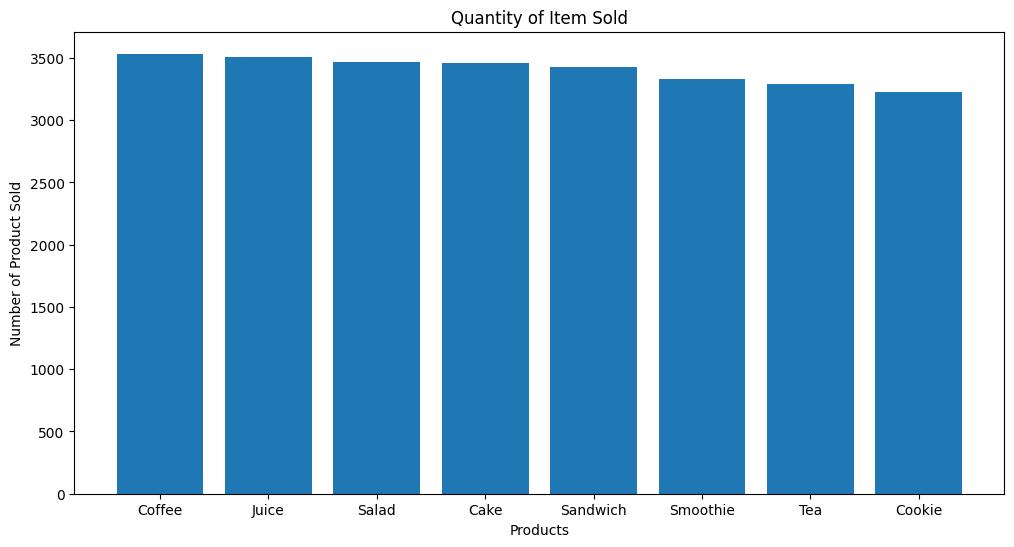

In [122]:
## Visualize insights
plt.figure(figsize=(12,6))
plt.bar(sold["Item"], sold["Quantity"])
plt.title("Quantity of Item Sold")
plt.xlabel("Products")
plt.ylabel("Number of Product Sold")
plt.show

# Find revenue of product sold

In [130]:
revenue = df.groupby("Item")[["Total Spent"]].sum().sort_values("Total Spent",ascending=False).reset_index()
revenue.head(8)


,Item,Total Spent
0,Salad,17320.0
1,Sandwich,13664.0
2,Smoothie,13320.0
3,Juice,10509.0
4,Cake,10395.0
5,Coffee,7062.0
6,Tea,4951.5
7,Cookie,3223.0


Text(0, 0.5, 'revenue in Dollars')

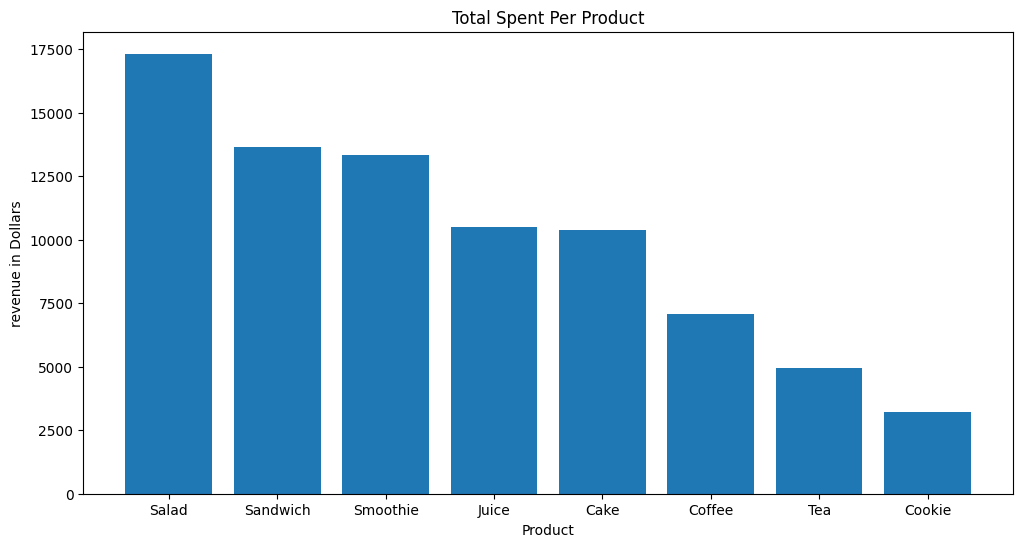

In [131]:
## Visualize insights

plt.figure(figsize=(12,6))
plt.bar(revenue["Item"], revenue["Total Spent"])
plt.title("Total Spent Per Product")
plt.xlabel("Product")
plt.ylabel("revenue in Dollars")

# Find total revenue and total sales

In [132]:
revenue.sum()

Item           SaladSandwichSmoothieJuiceCakeCoffeeTeaCookie
Total Spent                                          80444.5
dtype: object

In [133]:
sold.sum()

Item        CoffeeJuiceSaladCakeSandwichSmoothieTeaCookie
Quantity                                          27243.0
dtype: object

# Find sales per month

In [134]:
monthlySales = df.groupby("Month")[["Quantity"]].sum().reset_index()
monthlySales.head(12)


,Month,Quantity
0,2023-01,2442.0
1,2023-02,2252.0
2,2023-03,2463.0
3,2023-04,2373.0
4,2023-05,2332.0
5,2023-06,2461.0
6,2023-07,2336.0
7,2023-08,2408.0
8,2023-09,2356.0
9,2023-10,2534.0


Text(0, 0.5, 'Quanity Sold')

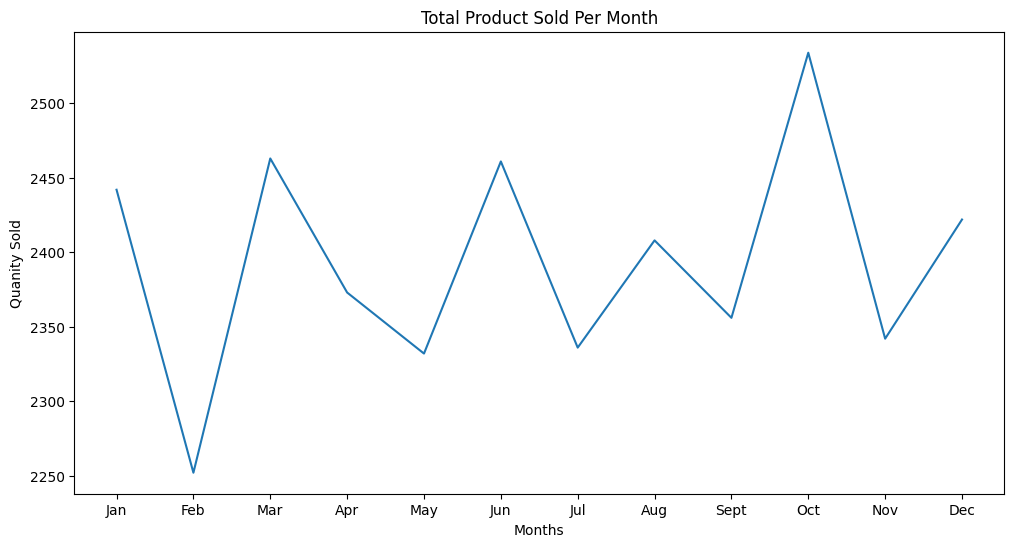

In [135]:
## Visualize insights
nameOfMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.figure(figsize=(12,6))
plt.plot(nameOfMonths, monthlySales["Quantity"])
plt.title("Total Product Sold Per Month")
plt.xlabel("Months")
plt.ylabel("Quanity Sold")

# Find revenue per month

In [136]:
monthlySales = df.groupby("Month")[["Total Spent"]].sum().reset_index()
monthlySales.head(12)

,Month,Total Spent
0,2023-01,7242.0
1,2023-02,6633.5
2,2023-03,7214.5
3,2023-04,7168.0
4,2023-05,6941.5
5,2023-06,7350.0
6,2023-07,6877.5
7,2023-08,7077.5
8,2023-09,6846.0
9,2023-10,7302.0


Text(0, 0.5, 'Revenue In Dollars')

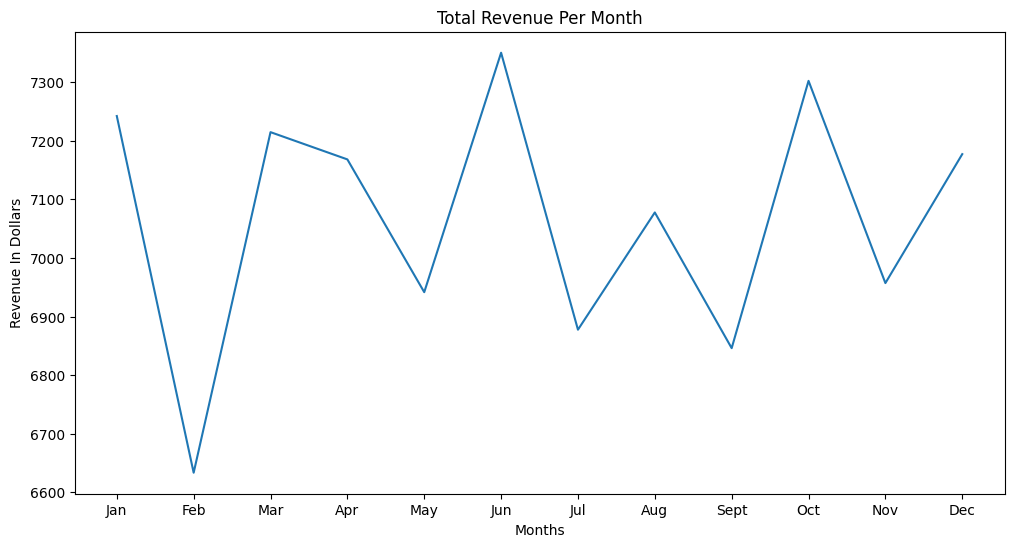

In [137]:
## Visualize insights
nameOfMonths = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.figure(figsize=(12,6))
plt.plot(nameOfMonths, monthlySales["Total Spent"])
plt.title("Total Revenue Per Month")
plt.xlabel("Months")
plt.ylabel("Revenue In Dollars")

# Find best payment type and location

In [138]:
df["Payment Method"].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

In [139]:
df["Location"].value_counts()

Location
Takeaway    3022
In-store    3017
Name: count, dtype: int64

# Compare location to the time of year

In [140]:
locationsPerMonth = pd.crosstab(df["Month"], df["Location"])
locationsPerMonth.head(12)

Location,In-store,Takeaway
Month,,
2023-01,261,257
2023-02,226,217
2023-03,232,258
2023-04,227,246
2023-05,225,234
2023-06,244,244
2023-07,241,239
2023-08,223,250
2023-09,236,244


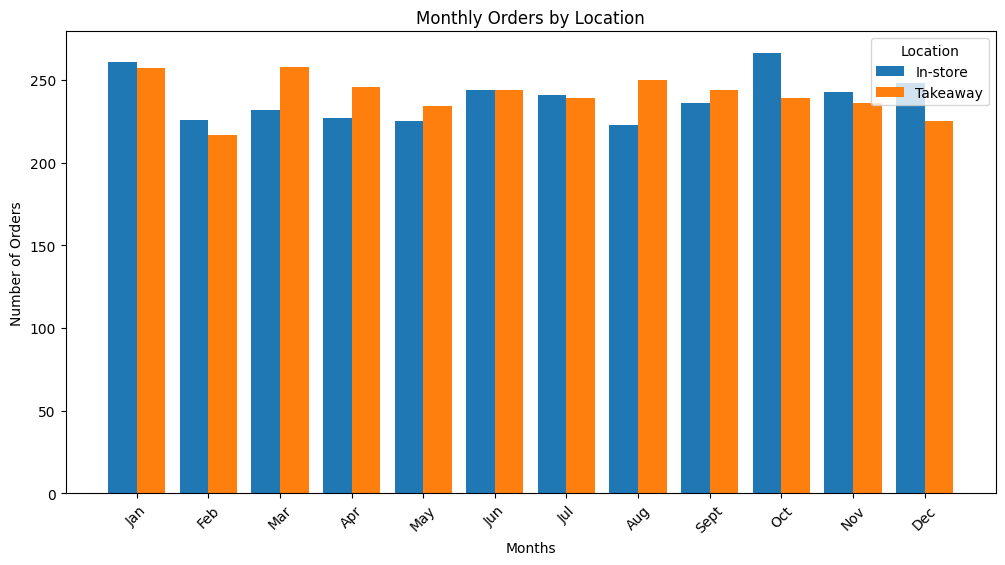

In [141]:
## Visualize insights
x = np.arange(len(nameOfMonths))

plt.figure(figsize=(12, 6))
plt.bar(x, locationsPerMonth["In-store"], 0.4, label="In-store")
plt.bar(x+0.4, locationsPerMonth["Takeaway"], 0.4, label="Takeaway")
plt.xticks(x + 0.4 / 2, nameOfMonths, rotation=45)
plt.title("Monthly Orders by Location")
plt.xlabel("Months")
plt.ylabel("Number of Orders")
plt.legend(title="Location")
plt.show()

# Find Payment types

In [117]:
df["Payment Method"].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64